In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import pandas as pd

In [2]:
df = pd.read_csv("possibilities-2.csv", index_col=0)
df

,1,2,3,4,5,6,7,8,9,10,11,12
LA,0,0,7,8,7,42,87,102,0,0,0,0
POR,54,143,32,24,0,0,0,0,0,0,0,0
WAS,0,0,0,0,0,0,0,0,33,210,10,0
HOU,3,5,27,64,92,45,17,0,0,0,0,0
ORL,0,0,0,0,0,0,0,35,185,33,0,0
CHI,0,9,24,67,73,67,13,0,0,0,0,0
RGN,0,3,4,4,6,20,76,105,35,0,0,0
KC,196,51,1,5,0,0,0,0,0,0,0,0
SD,0,42,144,29,32,6,0,0,0,0,0,0
LOU,0,0,0,0,0,0,0,0,0,10,240,3


In [3]:
table = pd.read_csv("table.csv", index_col=0)
table

,team,points,goals_for,goals_against,wins,goals_diff,tie_points,tie_goals
1,KC,32,25,27,9,-2,0,0
2,POR,31,39,20,8,19,0,0
3,SD,31,29,19,9,10,0,0
4,HOU,30,32,24,8,8,3,4
5,CHI,30,32,24,8,8,0,1
6,RGN,28,24,18,7,6,0,0
7,LA,26,20,20,7,0,0,0
8,NC,25,39,31,7,8,0,0
9,ORL,21,20,37,5,-17,0,0
10,LOU,17,19,31,3,-12,0,0


In [4]:
# Sort based on rank
df["rank"] = list(map(lambda x: table.index[table["team"] == x][0], df.index))
df = df.sort_values("rank", ascending=False)
df = df.drop("rank", axis=1)
df

,1,2,3,4,5,6,7,8,9,10,11,12
NJNY,0,0,0,0,0,0,0,0,0,0,3,250
WAS,0,0,0,0,0,0,0,0,33,210,10,0
LOU,0,0,0,0,0,0,0,0,0,10,240,3
ORL,0,0,0,0,0,0,0,35,185,33,0,0
NC,0,0,14,52,43,73,60,11,0,0,0,0
LA,0,0,7,8,7,42,87,102,0,0,0,0
RGN,0,3,4,4,6,20,76,105,35,0,0,0
CHI,0,9,24,67,73,67,13,0,0,0,0,0
HOU,3,5,27,64,92,45,17,0,0,0,0,0
SD,0,42,144,29,32,6,0,0,0,0,0,0


In [5]:
teams = {
    "NJNY": "NJ/NY Gotham",
    "POR": "Portland Thorns",
    "LA": "Angel City",
    "CHI": "Chicago Red Stars",
    "WAS": "Washington Spirit",
    "SD": "San Diego Wave",
    "NC": "NC Courage",
    "RGN": "OL Reign",
    "LOU": "Racing Louisville",
    "HOU": "Houston Dash",
    "ORL": "Orlando Pride",
    "KC": "KC Current",
}
colors = {
    "NJNY": "#000000",
    "POR": "#97262c",
    "LA": "#f8d5ce",
    "CHI": "#3cb5e4",
    "WAS": "#c20032",
    "SD": "#011e40",
    "NC": "#00416b",
    "RGN": "#002f87",
    "LOU": "#c5b4e1",
    "HOU": "#ff6a01",
    "ORL": "#60269e",
    "KC": "#62cac9",
}

<Figure size 28800x16200 with 0 Axes>

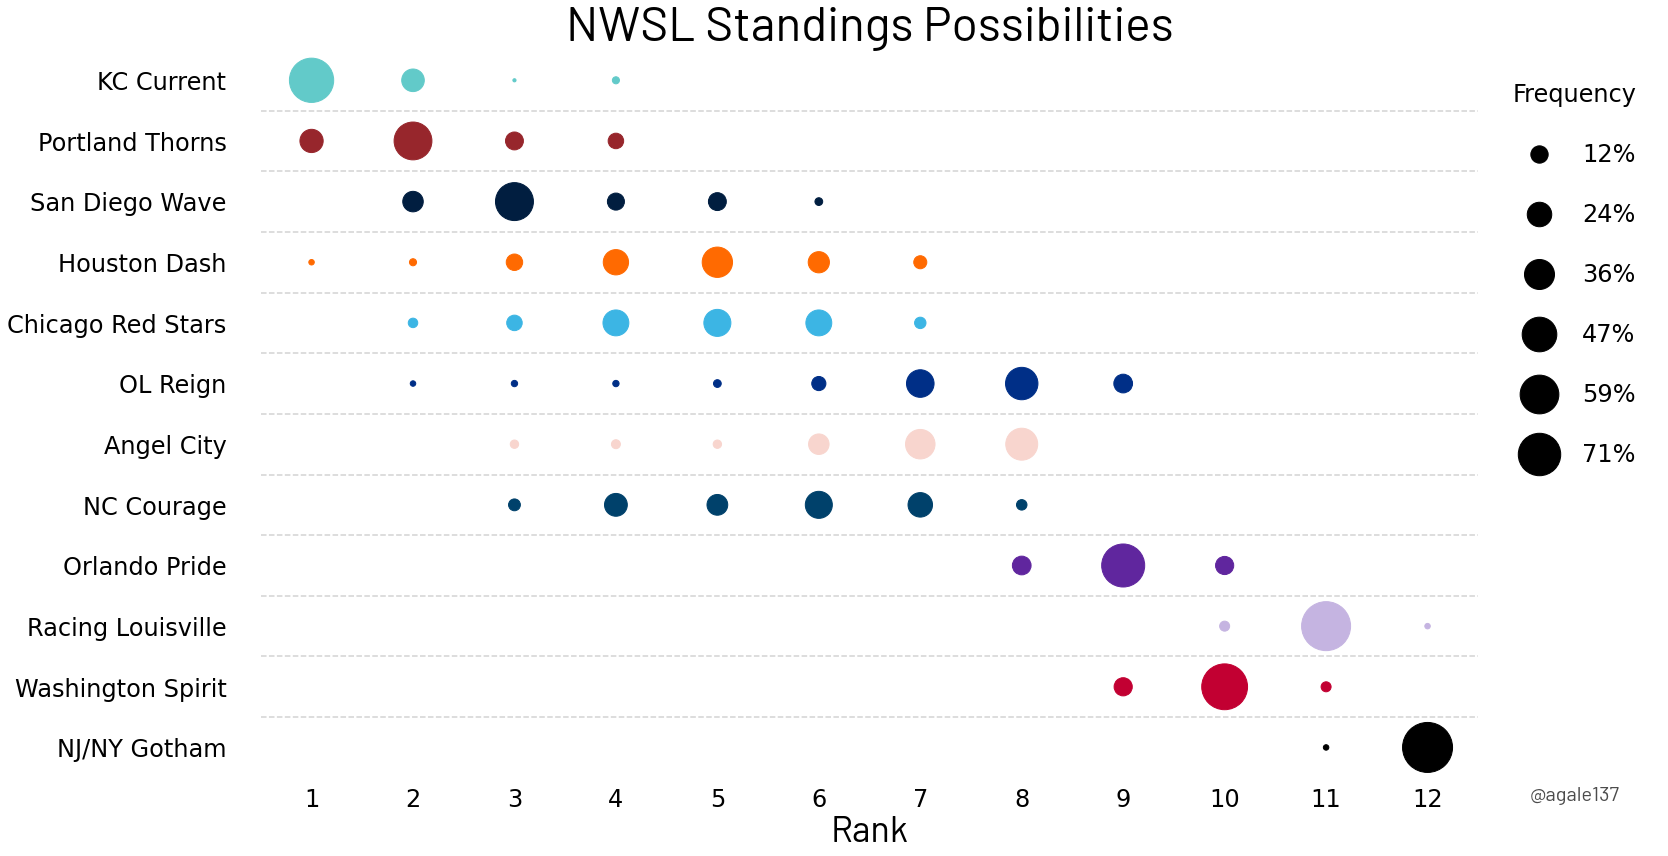

In [15]:
# Setup
barlow = fm.FontProperties(fname="/home/agale/nwsl-analytics/nwsl-rank/Barlow.otf")
plt.rcParams["figure.figsize"] = (24, 13.5)
plt.figure(dpi=1200, facecolor="white")
fig, ax = plt.subplots()
fig.patch.set_facecolor("white")

# Scale
scale = 10

# Plot data
for i, row in df.iterrows():
    sc = ax.scatter(df.columns, [i] * len(df.index), s=row * scale, c=colors[i])

    # Legend
    high = int("".join(filter(str.isdigit, sc.legend_elements("sizes", num=7)[1][-1])))
    if high > 300:
        plt.legend(
            *sc.legend_elements("sizes", num=7),
            loc="upper right",
            prop={"size": 24},
            bbox_to_anchor=(1.1, 1),
            labelspacing=1.5,
            title="Frequency",
            title_fontsize=24,
            borderpad=1,
            frameon=False
        )

# Format legend text
leg = ax.get_legend()
for lbl in leg.get_texts():
    val = int("".join(filter(str.isdigit, lbl.get_text()))) / scale / sum(df.iloc[0])
    lbl.set_text("{:.0%}".format(val))

# Horizontal spacers
for i in range(0, len(df.index) - 1):
    plt.hlines(y=i + 0.5, xmin=-0.5, xmax=11.5, linestyle="--", color="lightgray")

# Title
plt.title("NWSL Standings Possibilities", fontproperties=barlow, size=48)

# Axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="y", which="major", pad=-30)
plt.yticks(df.index, [teams[i] for i in df.index])
plt.xlabel("Rank", fontproperties=barlow, size=36)

# Username
plt.text(
    1.06,
    -0.02,
    "@agale137",
    transform=ax.transAxes,
    color="black",
    fontsize=20,
    alpha=0.7,
    fontproperties=barlow,
    va="center",
    ha="right",
)

# Save image
plt.savefig("possibilities-2.png", bbox_inches="tight", transparent=False)